In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
data= pd.read_csv('log_transformed.csv')
data.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
0,0,0,5.613128,8.025206,8.028504,220.13,260.13,1.386294,1539.0,1.386294,3.135494,3078.0,1539.0,7.50,1.386294,3.135494,3078.0,1539.0,7.50,0.0,0.0,0,0,1.386294,2.639057,6.0,0.0,1.386294,2.639057,6.0,0.0,2.431418,2.583998,20,7
1,1,1,6.570883,9.402942,9.403169,3691.26,3691.26,2.890372,4617.5,1.098612,0.693147,5787.0,3655.0,61.04,1.098612,0.693147,5787.0,3650.5,61.04,0.0,0.0,0,0,1.098612,2.639057,12.0,0.0,1.098612,2.639057,12.0,0.0,0.693147,0.693147,10,8
2,2,1,6.285998,7.244228,7.244228,900.13,900.13,1.609438,1539.0,1.098612,0.693147,1539.0,1539.0,66.32,1.098612,0.693147,1539.0,1539.0,66.32,0.0,0.0,0,0,1.098612,2.079442,6.0,0.0,1.098612,2.079442,6.0,0.0,0.693147,0.693147,19,8
3,3,1,5.493061,3.145358,3.145358,159.42,159.42,2.890372,947.0,0.693147,0.693147,0.0,0.0,0.00,1.098612,0.693147,947.0,947.0,2.50,0.0,0.0,0,0,1.386294,2.639057,6.0,0.0,1.386294,2.639057,6.0,0.0,0.693147,0.693147,6,6
4,4,1,6.855409,5.027947,5.027947,1098.90,1098.90,1.791759,2309.0,2.197225,1.386294,20029.0,2309.0,29.00,2.302585,1.386294,23496.0,2888.0,35.00,0.0,0.0,0,0,2.197225,3.784190,6.0,0.0,2.197225,3.784190,6.0,0.0,1.466337,1.466337,22,6


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,6.163687,6.366721,6.405799,2197.069184,2769.147968,1.706958,1719.109131,1.600070,1.463173,6861.071877,1475.941906,58.219786,1.847201,1.697395,10878.720344,1517.062192,55.956072,0.102775,0.122805,0.041495,0.045712,1.459672,2.727741,6.654554,0.054029,1.590976,2.890031,6.703134,0.046077,1.245174,1.343541,14.39894,6.797321
std,0.330519,0.906362,2.813755,2.843922,2552.708718,3251.352605,0.676218,1345.846661,0.595565,0.778612,6612.799020,1079.392998,64.544132,0.718458,0.998527,10789.012367,1056.056717,57.799928,1.155806,1.543246,0.397556,0.951386,0.418765,0.705414,2.147858,0.218039,0.549368,0.804962,2.103864,0.200692,0.629407,0.681295,8.43890,0.741435
min,0.000000,1.098612,0.693147,0.693147,-4334.360000,-5552.035000,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,-97.000000,0.693147,0.693147,0.000000,0.000000,-82.465000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,1.00000,6.000000
25%,1.000000,5.513429,3.794432,3.799824,280.420000,300.260000,1.098612,770.000000,1.098612,0.693147,1540.000000,770.000000,11.000000,1.386294,0.693147,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,6.000000,0.000000,1.098612,2.079442,6.000000,0.000000,0.693147,0.693147,7.00000,6.000000
50%,1.000000,6.270988,7.293817,7.314553,1083.570000,1334.000000,1.609438,1539.000000,1.609438,1.386294,4628.000000,1539.000000,33.900000,1.791759,1.386294,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,1.386294,2.639057,6.000000,0.000000,1.386294,2.639057,6.000000,0.000000,0.693147,1.299283,14.00000,7.000000
75%,1.000000,6.891626,8.888205,8.962493,3356.940000,4201.790000,2.197225,2309.000000,1.945910,2.079442,10010.000000,1924.000000,83.000000,2.302585,2.302585,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,1.791759,3.258097,6.000000,0.000000,1.945910,3.465736,6.000000,0.000000,1.749200,1.871802,21.00000,7.000000
max,1.000000,7.643962,9.800808,9.875342,7971.720000,10054.085000,2.890372,4617.500000,5.323010,3.688879,22715.000000,3655.000000,191.000000,5.823046,4.499810,36524.500000,3650.500000,176.375000,16.000000,21.000000,38.000000,64.000000,3.951244,5.730100,12.000000,3.000000,4.043051,6.086775,12.000000,3.000000,2.431418,2.583998,31.00000,8.000000


1st I will check the correlation of our independent variable and the target variable and will remove the columns which are very less correlated to our target variable.

Text(0.5, 1.0, 'Correlation with target Variables')

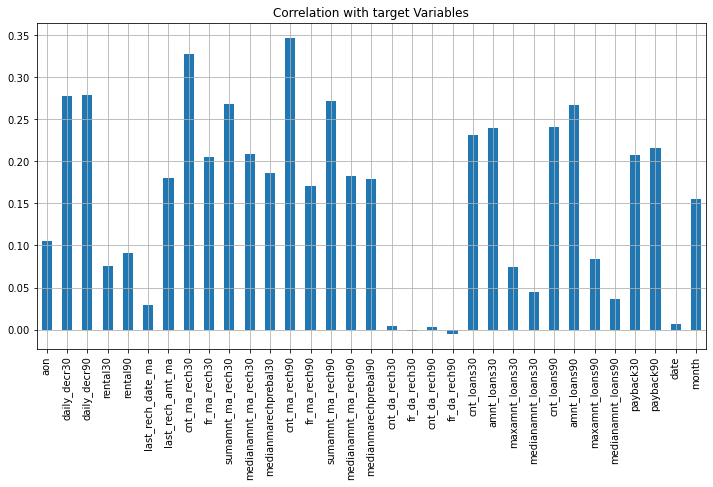

In [5]:
#checking the correlation of all the features with target variable
plt.figure(figsize=(12,6))
data.drop('label',axis=1).corrwith(data['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with target Variables')

here we can see that cnt_da_rech30, cnt_da_rech90, fr_da_rech30 and fr_da_rech90 are very less correlated to our target variable. date is also very less correlated. I will be removing these features for our model.

In [6]:
data.drop(['cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','date'],axis=1,inplace=True)

In [7]:
data.shape

(209593, 29)

In [8]:
#now  checking the correlation of all the variables.

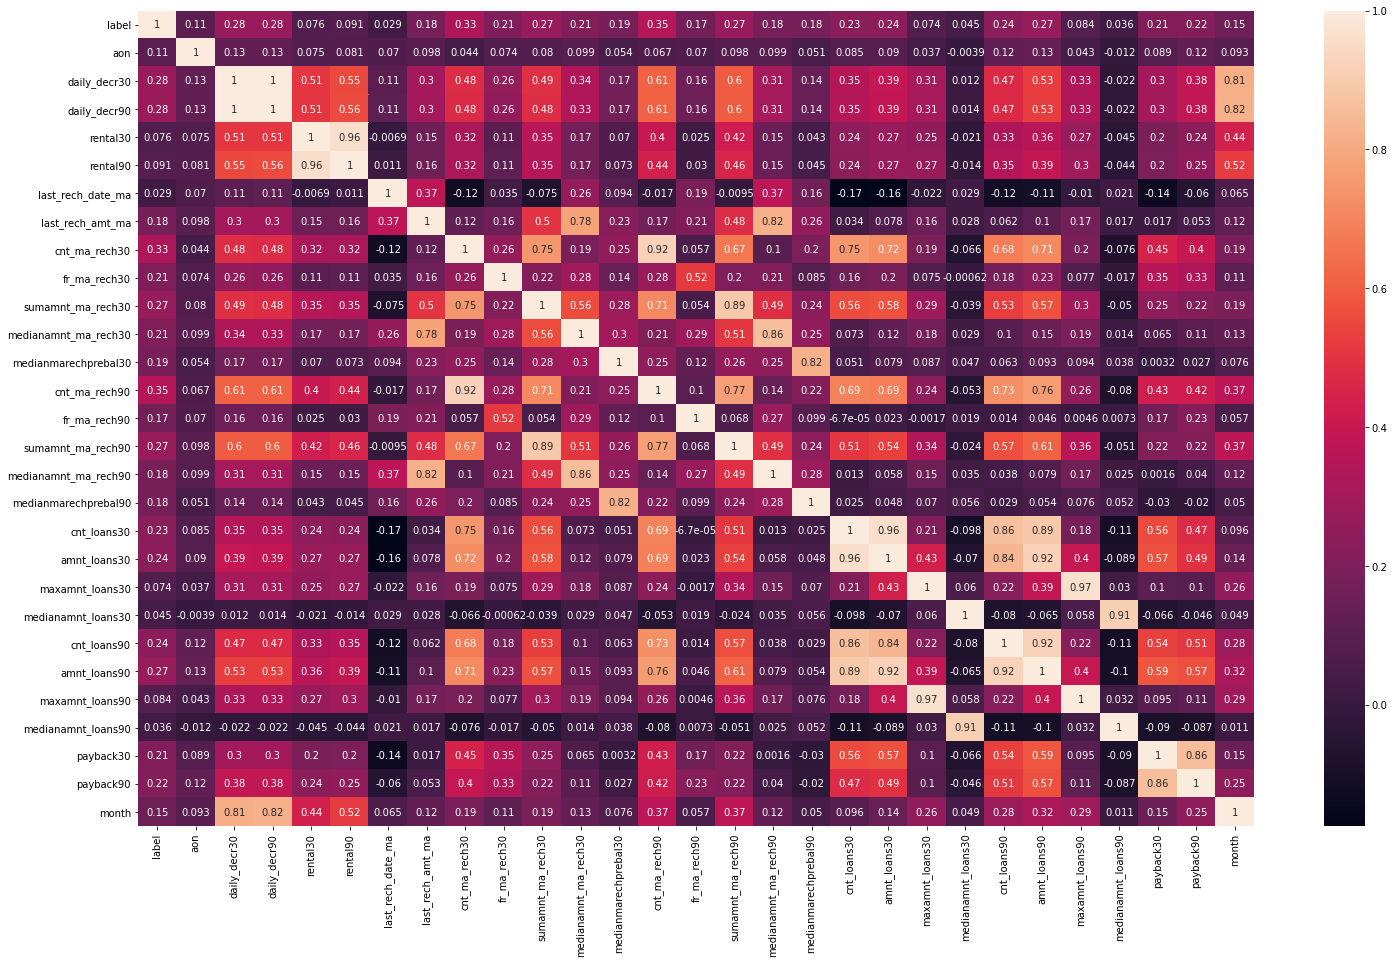

In [9]:
#correlation heatmap
corr_data = data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_data,annot=True)
plt.show()

Here I will filter variables which are correlated more than equal to .90 and from them I will remove that one which is less correlated to our target variable.

In [10]:
high_corr_rem = ['daily_decr30','rental30','cnt_loans30','cnt_ma_rech30','maxamnt_loans30','medianamnt_loans90','amnt_loans90']
new_data = data.drop(high_corr_rem,axis=1)

<AxesSubplot:>

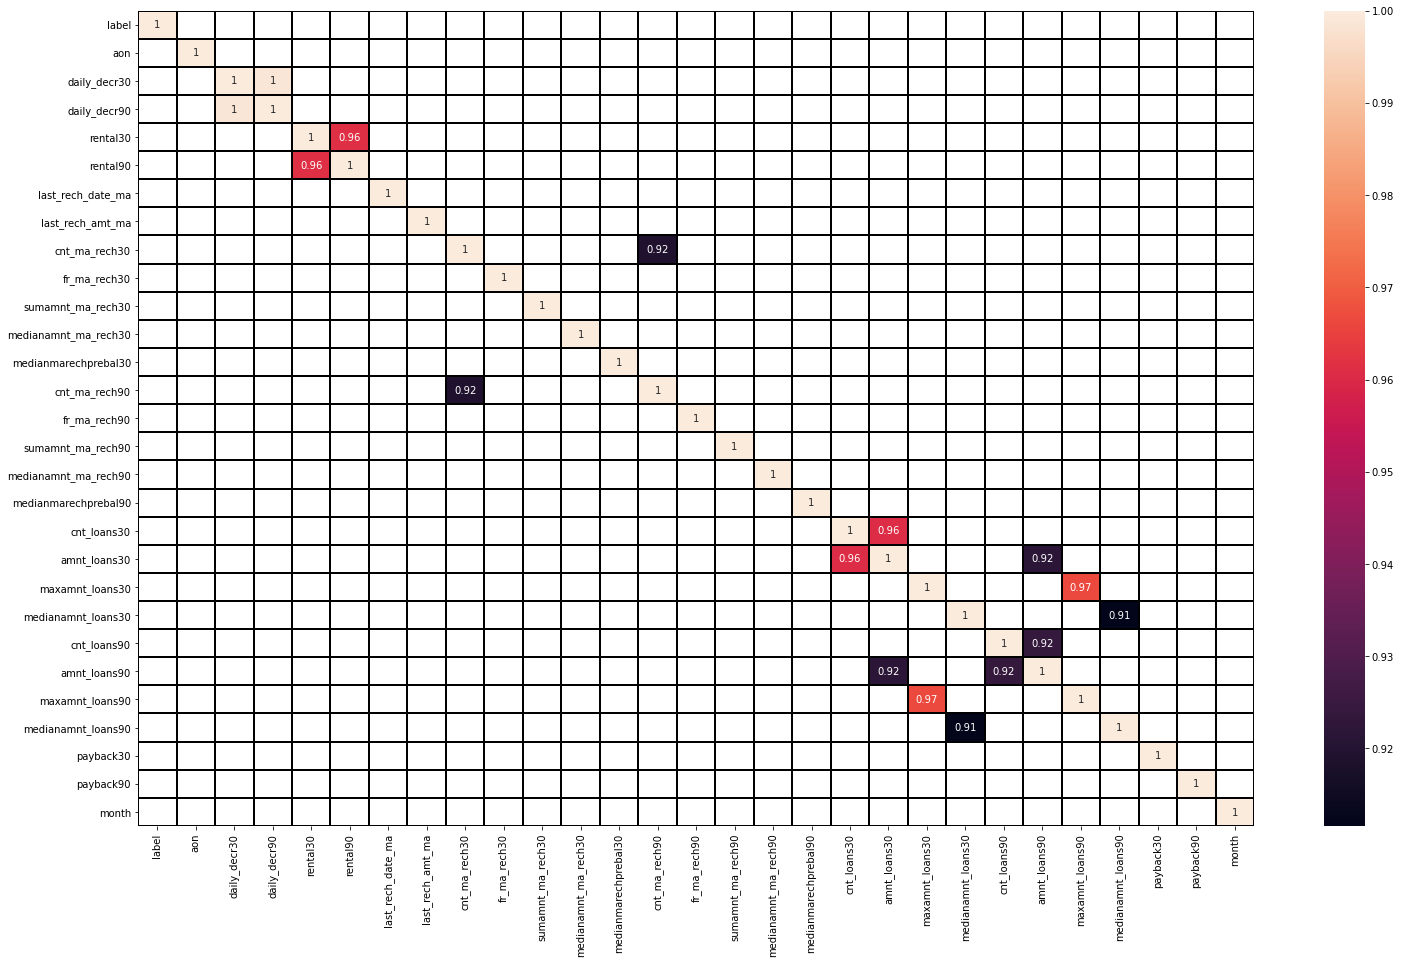

In [11]:
#showing correlation heatmap with colors only on corr value above .9
corr = data.corr()

kot = corr[corr>=.9]
plt.figure(figsize=(25,15))
sns.heatmap(kot, annot=True,linewidths=1,linecolor='black')

In [12]:
high_corr_rem = ['daily_decr30','rental30','cnt_ma_rech30','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30',
                'cnt_loans90']
new_data = data.drop(high_corr_rem,axis=1)

In [13]:
new_data.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,5.613128,8.028504,260.13,1.386294,1539.0,3.135494,3078.0,1539.0,7.50,1.386294,3.135494,3078.0,1539.0,7.50,2.639057,6.0,0.0,2.431418,2.583998,7
1,1,6.570883,9.403169,3691.26,2.890372,4617.5,0.693147,5787.0,3655.0,61.04,1.098612,0.693147,5787.0,3650.5,61.04,2.639057,12.0,0.0,0.693147,0.693147,8
2,1,6.285998,7.244228,900.13,1.609438,1539.0,0.693147,1539.0,1539.0,66.32,1.098612,0.693147,1539.0,1539.0,66.32,2.079442,6.0,0.0,0.693147,0.693147,8
3,1,5.493061,3.145358,159.42,2.890372,947.0,0.693147,0.0,0.0,0.00,1.098612,0.693147,947.0,947.0,2.50,2.639057,6.0,0.0,0.693147,0.693147,6
4,1,6.855409,5.027947,1098.90,1.791759,2309.0,1.386294,20029.0,2309.0,29.00,2.302585,1.386294,23496.0,2888.0,35.00,3.784190,6.0,0.0,1.466337,1.466337,6


In [14]:
new_data.to_csv('new_data.csv')